<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Ejercicios Axiomas de probabilidad
#1

In [ ]:
#2

In [ ]:
#3

In [ ]:
#Ejercicios Probabilidad condicional y total
#1

In [ ]:
#2

In [ ]:
#3

In [ ]:
#Teorema de Bayes
#1

In [ ]:
#2

In [ ]:
#3

In [ ]:
#4

In [ ]:
#Técnicas de conteo

In [ ]:
#1

In [ ]:
#2

In [ ]:
#3

In [ ]:
#4

In [ ]:
#5

In [ ]:
#6

In [ ]:
#7

In [ ]:
#8

In [ ]:
#9

In [ ]:
#10

In [ ]:
#11

In [ ]:
#12

In [ ]:
#13

In [ ]:
#14

In [ ]:
#15

In [ ]:
#16

In [ ]:
#17

In [ ]:
#18

In [ ]:
#19

In [ ]:
#20

In [ ]:
#Generales de Probabilidad
#1
outcomes = np.array([(x, y) for x in range(1, 7) for y in range(1, 7)])
A = outcomes[np.sum(outcomes, axis=1) <= 3]
B = outcomes[outcomes[:, 0] % 2 != 0]
P_A = len(A) / len(outcomes)
P_B = len(B) / len(outcomes)
P_A_or_B = len(np.unique(np.vstack((A, B)), axis=0)) / len(outcomes)
P_not_A = 1 - P_A

print(f"P(A): {P_A}, P(B): {P_B}, P(A ∪ B): {P_A_or_B}, P(A^c): {P_not_A}")

P(A): 0.08333333333333333, P(B): 0.5, P(A ∪ B): 0.5277777777777778, P(A^c): 0.9166666666666666


In [ ]:
#2
total_cells = 50
defectives = 2
n_samples = 5
P_no_defective = np.prod([(total_cells - defectives - i) / (total_cells - i) for i in range(n_samples)])
P_at_least_one_defective = 1 - P_no_defective

print(f"P(A): {P_at_least_one_defective}")

P(A): 0.19183673469387763


In [ ]:
#3
P_D = 0.6
P_C = 0.8
P_D_and_C = 0.5
P_D_or_C = P_D + P_C - P_D_and_C
print(f"P(D ∪ C): {P_D_or_C}")
P_only_one = P_D_or_C - P_D_and_C
print(f"P(Solo uno): {P_only_one}")

P(D ∪ C): 0.8999999999999999
P(Solo uno): 0.3999999999999999


In [ ]:
#4
import itertools
import random

def probabilidad_sin_cumpleaños_repetido(n):
    dias_totales = 365
    probabilidad = 1.0
    for i in range(n):
        probabilidad *= (dias_totales - i) / dias_totales
    return probabilidad
valores_n = list(range(1, 81))
probabilidades = [probabilidad_sin_cumpleaños_repetido(n) for n in valores_n]

In [ ]:
#5
eventos_totales = 36
eventos_suma_8 = len([(x, y) for x in range(1, 7) for y in range(1, 7) if x + y == 8])
P_A = eventos_suma_8 / eventos_totales
eventos_segundo_impar = len([(x, y) for x in range(1, 7) for y in range(1, 7) if y % 2 != 0])
P_B = eventos_segundo_impar / eventos_totales
eventos_A_interseccion_B = len([(x, y) for x in range(1, 7) for y in range(1, 7) if x + y == 8 and y % 2 != 0])
P_A_interseccion_B = eventos_A_interseccion_B / eventos_totales
producto_probabilidades = P_A * P_B

In [ ]:
#6
N = 10**5
experimentos_par = sum(1 for _ in range(N) if len(set(random.choices(range(1, 7), k=3))) < 3) / N
P_resultados = {
    "probabilidades_n": (valores_n, probabilidades),
    "probabilidad_A": P_A,
    "probabilidad_B": P_B,
    "interseccion": P_A_interseccion_B,
}


In [ ]:
#7

In [ ]:
#12

In [ ]:
#Problemas Hidden Markov Models
#1
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])
observed_sequence = ["S", "C", "C", "C", "S", "C", "S", "C"]
states = ["J", "B"]
emissions = ["C", "S"]
state_index = {state: i for i, state in enumerate(states)}
emission_index = {emission: i for i, emission in enumerate(emissions)}
tau = np.array([0.2, 0.8])

def viterbi(T, E, tau, observed_sequence):
    n_states = T.shape[0]
    n_observations = len(observed_sequence)
    dp = np.zeros((n_states, n_observations))
    backpointer = np.zeros((n_states, n_observations), dtype=int)
    first_obs = emission_index[observed_sequence[0]]
    dp[:, 0] = tau * E[:, first_obs]
    for t in range(1, n_observations):
        obs_idx = emission_index[observed_sequence[t]]
        for s in range(n_states):
            probs = dp[:, t-1] * T[:, s] * E[s, obs_idx]
            dp[s, t] = np.max(probs)
            backpointer[s, t] = np.argmax(probs)
    best_last_state = np.argmax(dp[:, -1])
    best_prob = dp[best_last_state, -1]
    best_path = [best_last_state]
    for t in range(n_observations - 1, 0, -1):
        best_last_state = backpointer[best_last_state, t]
        best_path.insert(0, best_last_state)
    best_path_states = [states[state] for state in best_path]
    return best_path_states, best_prob

best_sequence, best_prob = viterbi(T, E, tau, observed_sequence)
print(best_sequence, best_prob)


['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J'] 0.0009555148800000006


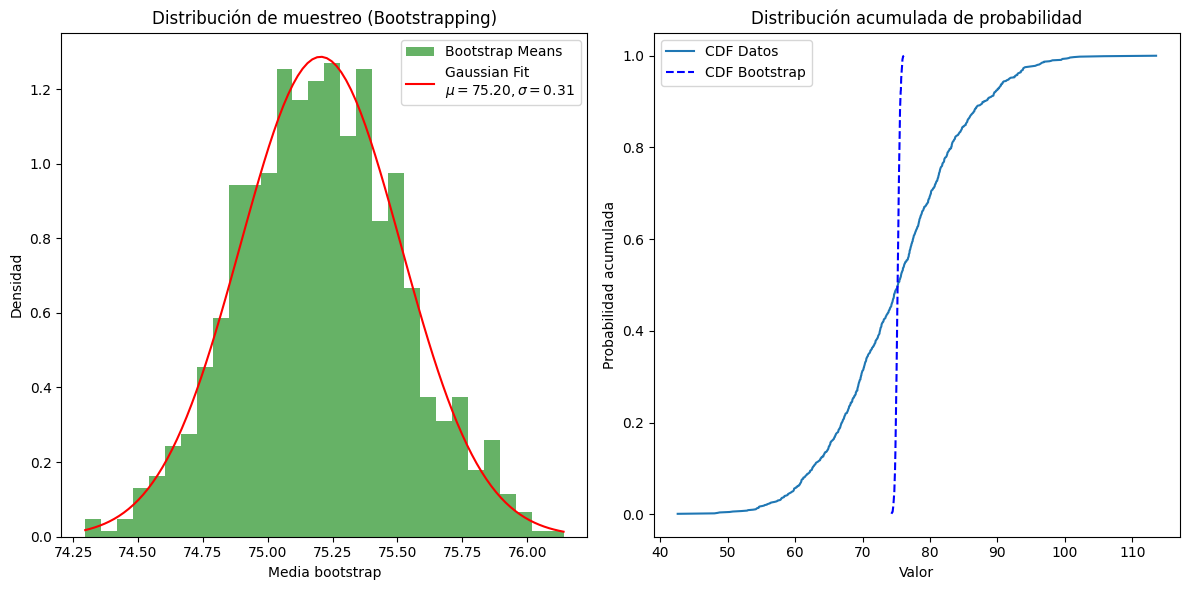

In [ ]:
#Ejercicios Muestreo
#7
np.random.seed(42)
data = np.random.normal(75, 10, 1000)
mean_data = np.mean(data)
median_data = np.percentile(data, 50)
sorted_data = np.sort(data)
cdf = np.arange(1, len(data) + 1) / len(data)
n_bootstrap = 1000
bootstrap_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]
mu_direct = np.mean(bootstrap_means)
sigma_direct = np.std(bootstrap_means)
x = np.linspace(min(bootstrap_means), max(bootstrap_means), 100)
gaussian_curve = (1 / (sigma_direct * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_direct) / sigma_direct) ** 2)
bootstrap_cdf = np.sort(bootstrap_means)
bootstrap_median = np.percentile(bootstrap_means, 50)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.6, color='g', label='Bootstrap Means')
plt.plot(x, gaussian_curve, 'r-', label=f'Gaussian Fit\n$\mu={mu_direct:.2f}, \sigma={sigma_direct:.2f}$')
plt.xlabel('Media bootstrap')
plt.ylabel('Densidad')
plt.title('Distribución de muestreo (Bootstrapping)')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(sorted_data, cdf, label='CDF Datos')
plt.plot(bootstrap_cdf, np.arange(1, len(bootstrap_means) + 1) / len(bootstrap_means),
         'b--', label='CDF Bootstrap')
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.title('Distribución acumulada de probabilidad')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#9

def calcular_velocidad_media(v1, v2):
    return (2 * v1 * v2) / (v1 + v2)
v_ida = 30
v_vuelta = 60
velocidad_media_9 = calcular_velocidad_media(v_ida, v_vuelta)
velocidad_media_9


40.0

In [ ]:
#10

def velocidad_media_ponderada(distancias, velocidades):
    total_distancia = sum(distancias)
    total_tiempo = sum(d / v for d, v in zip(distancias, velocidades))
    return total_distancia / total_tiempo


distancias = [100, 150, 200]  # millas
velocidades = [50, 60, 80]  # millas por hora
velocidad_media_10 = velocidad_media_ponderada(distancias, velocidades)
velocidad_media_10


64.28571428571429

In [ ]:
#11
import numpy as np

N = 10000
X1 = -3 * np.log(np.random.rand(N) * np.random.rand(N))
U1 = np.random.rand(N)
U2 = np.random.rand(N)
Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
X2 = 5 + 2 * Z
X3 = 10 * np.random.rand(N)
X = X1 + 2 * X2 - X3
mean_X_direct = np.mean(X)
var_X_direct = np.var(X, ddof=1)
a = np.array([1, 2, -1])
means = np.array([np.mean(X1), np.mean(X2), np.mean(X3)])
mean_X_theoretical = a @ means
cov_matrix = np.cov(np.vstack([X1, X2, X3]), ddof=1)
var_X_theoretical = a @ cov_matrix @ a
def pearson_corr(X, Y):
    return np.cov(X, Y, ddof=1)[0, 1] / (np.std(X, ddof=1) * np.std(Y, ddof=1))
corr_X1_X2 = pearson_corr(X1, X2)
corr_X1_X3 = pearson_corr(X1, X3)
corr_X2_X3 = pearson_corr(X2, X3)
(mean_X_direct, var_X_direct, mean_X_theoretical, var_X_theoretical, corr_X1_X2, corr_X1_X3, corr_X2_X3)


(11.069660103843516,
 42.78255910835116,
 11.069660103843516,
 42.78255910835117,
 0.004278010162478099,
 -0.001530438436121782,
 -0.005834002220744797)

In [ ]:
#Ejercicios Método de MonteCarlo
#6
N = 10000
R = 1
rho = 1
phi = np.random.uniform(0, 2 * np.pi, N)
theta = np.random.uniform(0, np.pi, N)
x = R * np.sin(theta) * np.cos(phi)
y = R * np.sin(theta) * np.sin(phi)
z = R * np.cos(theta)
I_xx = (1 / N) * np.sum(y**2 + z**2)
I_yy = (1 / N) * np.sum(x**2 + z**2)
I_zz = (1 / N) * np.sum(x**2 + y**2)
I_xy = -(1 / N) * np.sum(x * y)
I_theoretical = 2 / 5 * R**2

print("Estimación Monte Carlo de los momentos de inercia:")
print(f"I_xx ≈ {I_xx}")
print(f"I_yy ≈ {I_yy}")
print(f"I_zz ≈ {I_zz}")
print(f"I_xy ≈ {I_xy}")
print("\nResultados teóricos (I_xx, I_yy, I_zz):")
print(f"I_theoretical = {I_theoretical}")


Estimación Monte Carlo de los momentos de inercia:
I_xx ≈ 0.7518948392013033
I_yy ≈ 0.7460323846830336
I_zz ≈ 0.5020727761156633
I_xy ≈ 0.0009536934902458417

Resultados teóricos (I_xx, I_yy, I_zz):
I_theoretical = 0.4


In [ ]:
#9
import numpy as np

def gamma_function(n):
    if n == 1:
        return 1
    return (n - 1) * gamma_function(n - 1)

def beta_pdf(x, alpha, beta):

    numerator = gamma_function(alpha + beta) * (x**(alpha - 1)) * ((1 - x)**(beta - 1))
    denominator = gamma_function(alpha) * gamma_function(beta)
    return numerator / denominator

alpha = 2
beta = 4
tolerance = 0.01
np.random.seed(42)
num_points = 10000
x_test = np.linspace(0, 1, 1000)
max_pdf = max(beta_pdf(x, alpha, beta) for x in x_test)
x_values = np.random.uniform(0, 1, num_points)
y_values = np.random.uniform(0, max_pdf, num_points)
under_curve = [y <= beta_pdf(x, alpha, beta) for x, y in zip(x_values, y_values)]
area_estimated = (sum(under_curve) / num_points) * (1 * max_pdf)

while True:
    num_points *= 2
    x_values = np.random.uniform(0, 1, num_points)
    y_values = np.random.uniform(0, max_pdf, num_points)
    under_curve = [y <= beta_pdf(x, alpha, beta) for x, y in zip(x_values, y_values)]
    new_area_estimated = (sum(under_curve) / num_points) * (1 * max_pdf)
    if abs(new_area_estimated - area_estimated) / area_estimated < tolerance:
        area_estimated = new_area_estimated
        break

print(f"El área estimada bajo la curva es aproximadamente: {area_estimated:.4f}")


El área estimada bajo la curva es aproximadamente: 1.0026
